# **2. Валидация данных. Методы валидации**

Перед тем как приступить к изучению валидации данных, давайте постараемся ответить на следующий вопрос: **«Почему нельзя обучать модель на всех доступных данных?»**

## → Основная цель обучения модели — получить модель с хорошей прогностической способностью, которая решает поставленную задачу с заданным показателем метрики. 

Нам не столько важен результат предсказания на том наборе данных, на котором мы обучаем модель (нам уже известны все значения признаков в нём), сколько важно уметь предсказывать значения целевого признака для объектов, которых мы ещё не видели.

## Таким образом, главная цель машинного обучения — усвоить общие закономерности в данных, а не просто запомнить **обучающий, или тренировочный, набор данных (training data)**.

## Поэтому так важно иметь отложенный набор данных (с известными правильными ответами), который модель не видела во время обучения. На нём мы будем оценивать качество обученной модели.

В предыдущих модулях по машинному обучению тот набор данных, на котором мы проверяли качество построенной модели, мы называли **тестовым набором данных (testing data)**. Мы заранее выделяли этот набор данных для того, чтобы рассчитать финальную метрику модели и сделать вывод о том, устраивает ли нас качество моделирования. Такой подход называется **двухкомпонентным**.

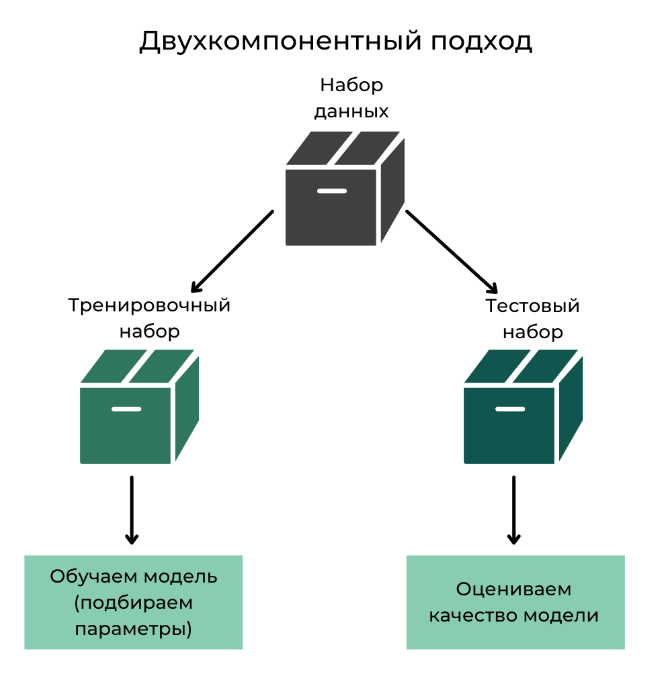

### **Примечание**. Ранее мы использовали тестовый набор не только для проверки итогового качества, но и для подбора внешних параметров. Вспомните: мы выбирали оптимальные пороги вероятности и коэффициенты регуляризации, при которых наблюдался максимум целевой метрики (мы использовали $F_1$-меру). 

### Однако такой подход не совсем корректен, ведь мы подстраивали модель под тестовую выборку, то есть по сути занимались небольшим самообманом. Тестовая выборка должна быть «независимым судьёй», который объективно и непредвзято «выносит приговор» нашей модели.



Из-за этого в больших Data Science-проектах используются не два, а три набора данных: в дополнение к тренировочному и тестовому наборам данных выделяется **валидационный набор (validation data)**. Этот набор используется для промежуточного контроля качества модели и настройки внешних параметров, которые задаёт исследователь при построении модели. Такой подход называется **трёхкомпонентным**.

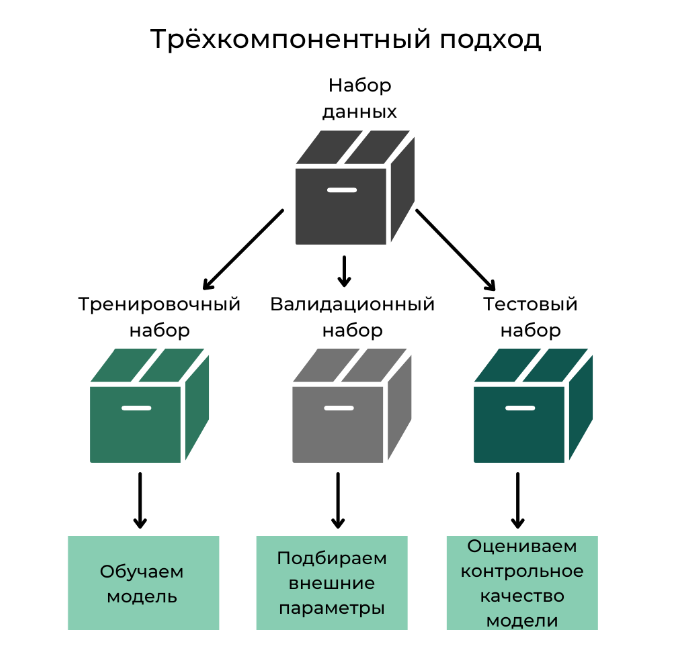

## Итак, существуют **три основных вида выборок**, которые используются в машинном обучении:

### 1. **Обучающая (тренировочная)** — набор данных, который используется в процессе обучения модели (подбора внутренних параметров, например коэффициентов линейной регрессии или предикатов в деревьях решений).

### 2. **Валидационная (проверочная)** — набор данных, на котором мы оцениваем промежуточные результаты обучения.

### Основная цель создания такого набора данных — отслеживание переобучения.

### На валидационной выборке мы производим **подбор гиперпараметров** — внешних параметров модели, например коэффициентов регуляризации, максимальной глубины дерева, количества деревьев в случайном лесу и т. д.

### 3. **Тестовая (контрольная)** — набор данных, который имитирует работу модели в реальных условиях после подбора всех параметров.

### С помощью этого набора осуществляется окончательная проверка качества.

### Главное условие для тестовой выборки — она должна быть независимой от обучающей.

# **ОСОБЕННОСТИ ТЕРМИНОЛОГИИ**

В промышленности, научных кругах и различной литературе термины **валидационная** и **тестовая выборка** зачастую употребляются как синонимы. Строго говоря, они не являются таковыми.

Тестирование — это попытка что-то выяснить, а валидация — доказать, что что-то является истиной (в нашем случае — доказать, что качество модели на валидационной выборке совпадает с качеством при обучении).

Вне зависимости от того, как будут называться контрольные выборки, важная концепция, которую необходимо сохранить, состоит в том, что **окончательный набор** (называемый тестом или валидацией) не используется в процессе обучения модели, а **используется исключительно для оценки её качества**.

### Процесс проверки предсказательной способности модели машинного обучения называется **валидацией**.

Существует несколько методов такого контроля. Мы последовательно рассмотрим каждый из них.

Но прежде чем мы перейдём к обсуждению методов валидации, давайте познакомимся с данными, на которых будем практиковаться ↓

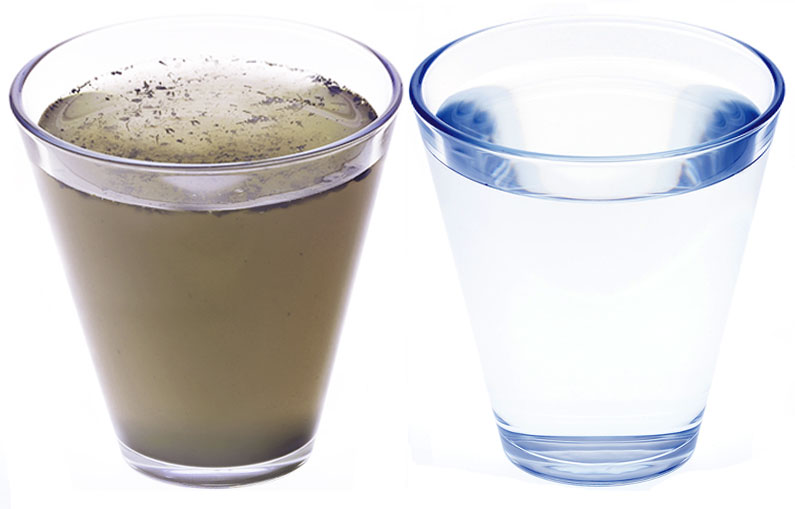

В этом модуле мы будем решать **задачу классификации**: классифицировать воду на пригодную и непригодную для питья на основе её химического состава.

Скачать набор данных можно здесь. С подробным описанием датасета и столбцов таблицы ознакомьтесь в источнике.

Переходим к работе с данными. Импортируем модули, которые нам понадобятся:

In [4]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

C:\Users\sphex\AppData\Local\Temp\ipykernel_11444\3755730.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #стиль отрисовки seaborn


In [5]:
# Прочитаем данные о собранных образцах воды и выведем первые пять строк таблицы:
water_data = pd.read_csv('data/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Невооруженным глазом видно, что большинство столбцов таблицы являются числовыми. Целевой признак — **Potability** (пригодность для питья): 1 — вода пригодна, 0 — вода непригодна для питья.

В данных есть пропуски. Выведем информацию о них в процентном соотношении:

In [6]:
display(water_data.isnull().mean() * 100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Итак, у нас отсутствует около 15 % информации о кислотности воды (ph), около 24 % — о содержании сульфатов (Sulfate) и около 5 % — о тригалометанах (Trihalomethanes). Мы знаем, что пропуски — непосильная ноша для большинства моделей машинного обучения. Их необходимо обработать.

Заполним пропуски медианным значением в признаке зависимости класса воды (Potability). Для этого сгруппируем данные по признаку Potability, посчитаем медиану в каждой группе, а затем отправим результат в метод fillna():

In [7]:
#Заполняем пропуски
water_data['ph'] = water_data['ph'].fillna(water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

In [8]:
#Убедимся в отсутствии пропусков:
display(water_data.isnull().mean() * 100)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

Теперь проблема пропусков устранена. Давайте по традиции разделим набор данных на матрицу наблюдений X и вектор правильных ответов y:

In [9]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

## Задание 2.1

Зачем нужно разделение на валидационную и тестовую выборки?

+ Когда производится подбор внешних параметров, модель может неявно адаптироваться под валидационную выборку, поэтому следует дополнительно проверить её качество на тестовой.

## Задание 2.2

Когда выборка делится на несколько частей, какая часть обычно самая большая?

+ Обучающая

### Рассмотрим **основные методы валидации данных** на примере нашего набора данных ↓

# HOLD-OUT

## Метод **hold-out (отложенная выборка)** нам уже знаком. Это самый простой и очень популярный метод.

### Его идея состоит в том, что для проверки модели мы просто случайным образом разбиваем весь набор данных на обучающую, валидационную и тестовую выборки (последняя — по желанию).

Обычно разбиение производится в соотношении 70/30 или 80/20 при двухкомпонентном подходе, и в соотношении 70/15/15 или 80/10/10 — при трёхкомпонентном.

Схема разбиения представлена ниже:

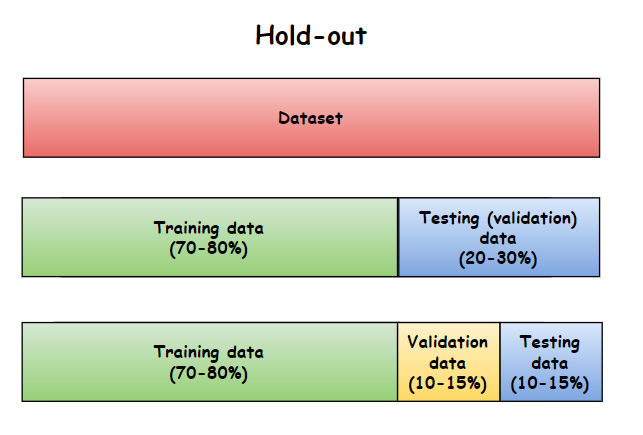

## ПРЕИМУЩЕСТВА И НЕДОСТАТКИ HOLD-OUT

+ ПРЕИМУЩЕСТВА
 + Очень простой и понятный.
 + Чаще всего применяется на больших датасетах, так как требует значительно меньше вычислительных мощностей, чем другие методы.

+ НЕДОСТАТКИ
 + Важно помнить, что разбиение производится случайным образом и оценка в этом методе зависит от того, какие наблюдения попали в набор для валидации. Это плохо, так как возможна ситуация, когда распределение целевого признака в тренировочной, валидационной (и тестовой) выборках может значительно различаться, и оценка качества может быть необъективной.

# РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

Все методы разбиения выборки и валидации, которые мы будем изучать, находятся в модуле model_selection, мы импортировали его заранее.

Метод hold-out реализован в уже знакомой вам функции train_test_split(). Она предназначена для разбиения исходного набора данных случайным образом на две части в заданных соотношениях.

## Основные параметры train_test_split():

+ *arrays — порядковый аргумент с переменным количеством. Набор массивов (это могут быть списки, numpy-массивы, DataFrame), которые подлежат разбиению.
+ test_size — размер тестовой (валидационной) выборки. Может быть указан в долях. Определяется автоматически, если параметр test_size передан как 1-train_size.
+ train_size — размер тренировочной выборки. Может быть указан в долях. Определяется автоматически, если параметр test_size передан как 1-test_size.
+ random_state — число, на основе которого производится генерация случайных чисел.
+ shuffle — параметр, указывающий, стоит ли перемешивать выборку перед разбиением (по умолчанию True).
+ stratify — стратифицированное разбиение (о нём мы поговорим в юните по дисбалансу выборки).

Если мы используем **двухкомпонентный подход** (разбиваем выборку на тренировочную и валидационную, она же тестовая), то всё очень просто: нам лишь нужно вызвать функцию train_test_split() и передать в неё матрицу наблюдений X и вектор-столбец с правильными ответами y.

Для примера разделим выборку в соотношении 80/20 (test_size=0.2), в качестве значения параметра random_state по традиции возьмём число 42.

Функция вернёт четыре массива:

+ таблицу X с обучающими примерами,
+ таблицу X с примерами для валидации,
+ столбец y с ответами на обучающие примеры,
+ столбец y с ответами на валидационные примеры.




In [10]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Проверим размеры полученных выборок:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (2620, 9)
Valid shape: (656, 9)


Итак, 2620 образцов воды являются обучающими — в них модель будет искать закономерности и подбирать внутренние параметры, а 656 являются валидационными — на них мы будем производить контроль качества.

Далее нам останется только обучить модель на тренировочной выборке (X_train, y_train) и рассчитать метрики на валидационной выборке (X_valid, y_valid).

В качестве модели будем использовать **дерево решений** с максимальной глубиной 7, энтропией в качестве критерия информативности, минимальное число объектов в листе дерева — 5.

После обучения сделаем предсказание для каждой из выборок и рассчитаем метрику. В качестве метрики для простоты возьмём долю правильных ответов — accuracy.

In [12]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print('Train hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred))) 

Train hold-out accuracy: 0.82
Valid hold-out accuracy: 0.77


### Если же мы используем **трёхкомпонентный подход** (разбиваем выборку на тренировочную, валидационную и отдельную тестовую), нам понадобится чуть больше кода. К сожалению, в sklearn нет специализированного функционала для такого разбиения.

Применим функцию train_test_split() дважды: сначала разобьём исходный набор на тренировочный и валидационный в соотношении 80/20, затем разобьём валидационный набор на валидационный и тестовый в соотношении 50/50. В итоге наша выборка будет разбита в соотношении 80/10/10:

In [13]:
#разбиваем исходную выборку на тренировочную и валидационную в соотношении 80/20
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
#разбиваем валидационную выборку на валидационную и тестовую в соотношении 50/50
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

In [14]:
#Выводим размерности
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2620, 9)
Valid shape: (328, 9)
Test shape: (328, 9)


В этом случае мы будем обучаться на 2620 примерах, 328 будем использовать для промежуточного контроля и подбора внешних параметров и ещё 328 будут нашим контрольным рубежом — их мы будем использовать для принятия финального решения о качестве модели.

## Задание 2.3

Какая потенциальная проблема может возникнуть, если использовать для валидации метод hold-out?

+ Из-за случайной природы метода в тренировочный и тестовый наборы могут попасть разнородные данные, из-за чего оценки качества могут быть необъективными.

## Задание 2.4

С помощью какой функции в sklearn создаётся отложенная выборка?

+ train_test_split()

# K-FOLD

## Метод k-fold более известен как **кросс-валидация (cross validation)**, или **перекрёстный контроль**.

Пожалуй, это самый популярный метод валидации для оценки качества моделирования, и он используется практически во всех проектах. Эта идея также применяется во многих моделях и методах машинного обучения, например в стекинге.

### Напомним **алгоритм кросс-валидации**:

1. Разбить исходную выборку на $k$ частей — **фолдов (fold)**.
2. Повторять $k$ раз:

+ Обучить модель на $k$-1 частях. Назовём их **тренировочными фолдами (training fold)**. 
+ Произвести оценку качества (вычислить метрику) на оставшейся части. Назовем её **валидационным фолдом (validation fold)**.

3. Усреднить значения метрики на валидационных фолдах.



Схематично алгоритм кросс-валидации можно представить следующим образом (на рисунке представлена схема работы кросс-валидации с предварительно выделенной для тестирования выборкой):

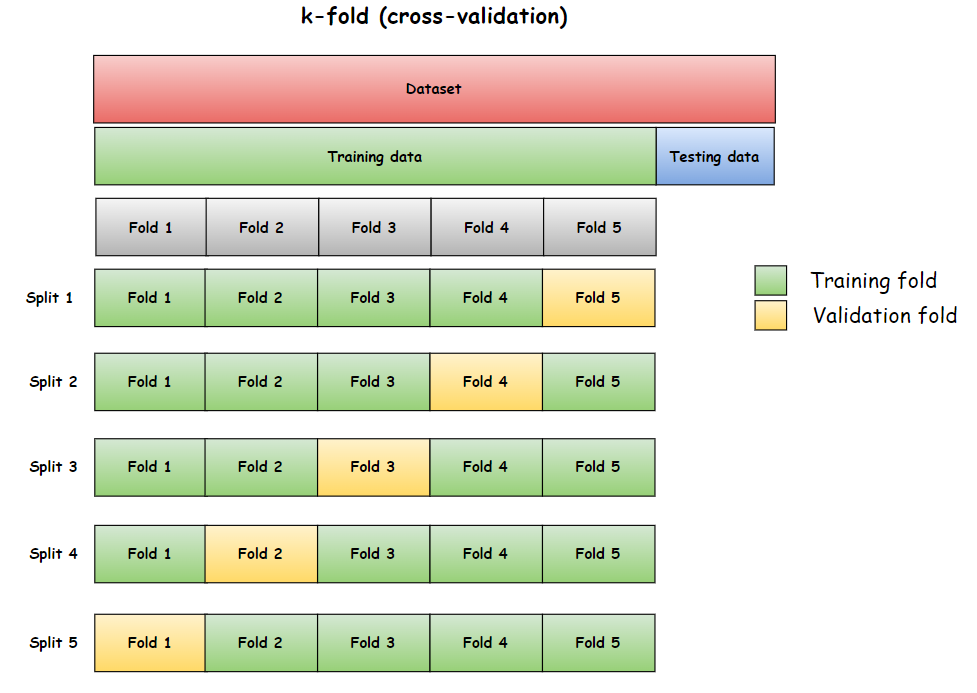

Благодаря такому подходу мы избавляемся от необходимости создавать отложенную валидационную выборку — мы генерируем её искусственно на каждом из этапов кросс-валидации из исходного набора данных. Каждая из $k$ частей исходного обучающего набора данных используется в качестве валидационной выборки.

Для больших наборов данных в качестве значения $k$ часто берут 10, то есть выборка разбивается на десять фолдов. В случае маленьких выборок $k$ берут равным 3 или 5.

## → Чем больше $k$, тем больше моделей будут обучаться, тем объективнее будет оценка качества, однако тем больше времени займёт процесс валидации.

# ПРЕИМУЩЕСТВА И НЕДОСТАТКИ K-FOLD

+ ПРЕИМУЩЕСТВА

 + Подход позволяет получить более устойчивую к выбросам оценку качества модели, так как модель обучается на нескольких независимых наборах данных.
 + Значения метрик получаются более объективными, ведь мы обучаем одну модель $k$ раз — у нас получается $k$ независимых друг от друга значений метрики.

**Примечание**. Мы оцениваем метрику не по одному значению на валидационной выборке, как это было в hold-out, а по $k$ значений. Если $k$ достаточно велико, можно даже построить гистограмму и оценить, в каких пределах находится истинное качество. Однако на практике этим занимаются крайне редко, так как такие вычисления очень времязатратны.

+ НЕДОСТАТКИ

 + Подход предусматривает, что мы обучаем одну и ту же модель $k$ раз, что, очевидно, плохо сказывается на производительности. Если модель обучается довольно медленно (например, сложная нейронная сеть), то валидация может занять очень много времени.

# РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

В библиотеке sklearn метод k-fold реализован в классе KFold.

### **Основные параметры инициализатора KFold:**

+ n_split — число фолдов (число $k$ из метода k-fold). По умолчанию — 5.
+ shuffle — параметр, указывающий, стоит ли перемешивать исходный набор данных перед разбиением. По умолчанию — False.
+ random_state — число, на основе которого производится генерация случайных чисел, если набор данных будет перемешиваться.

У объекта класса KFold есть метод split(). В данный метод необходимо передать матрицу наблюдений X и вектор-столбец ответов y — метод вернёт генератор, который позволит получать индексы тренировочной и валидационной выборок, сгенерированных по методу k-fold.

Будем использовать двухкомпонентный контроль, то есть подавать в кросс-валидацию весь доступный набор данных без предварительного выделения тестовой выборки.

Создадим объект KFold для кросс-валидации с пятью фолдами, остальные параметры оставим по умолчанию. Затем организуем цикл for для получения элементов из генератора, созданного с помощью метода split(). На каждой итерации в переменных train_index и valid_index будут находиться индексы текущей тренировочной и валидационной выборок соответственно.

В цикле будем:

+ выделять строки таблицы, относящиеся к текущим тренировочной и валидационной выборкам, в отдельные таблицы;
+ обучать дерево решений;
+ делать предсказания для текущих тренировочной и валидационной выборок;
+ рассчитывать метрику accuracy на текущих выборках и заносить её значение в список.

Код будет выглядеть следующим образом:

In [12]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics = []
val_metrics = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    #Обучаем случайный лес на тренировочной выборке
    model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    #Рассчитываем метрику и заносим её в список
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

In [13]:
#Выведем содержимое массивов train_metrics и val_metrics:
print(train_metrics)
print(val_metrics)

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]


В каждом из выведенных списков содержится по пять значений метрики accuracy, вычисленных на тренировочном и валидационном фолдах кросс-валидации. Для агрегированной оценки рассчитаем среднее значение метрик:

In [14]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


Итак, среднее значение метрики accuracy на кросс-валидации равно 0.81 для тренировочных фолдов и 0.74 — для валидационных фолдов. Помним о том, что основной показатель для нас — метрика на валидационных фолдах (если не предусмотрена тестовая выборка). 

### **Примечание**. Если количество фолдов больше 30, вы можете построить доверительный интервал для среднего значения метрики. О доверительных интервалах мы говорили в модуле по A/B-тестированию.

Согласитесь, сложновато — не совсем в стиле sklearn. Тут и циклы, и генераторы... Неужели каждый раз придётся писать подобный код для проведения кросс-валидации?

Конечно же, нет. На самом деле весь приведённый выше код можно значительно сократить, если использовать специальную **функцию для кросс-валидации** — cross_validate() из модуля model_selection. Она организует процедуру кросс-валидации и расчёт метрик.

**Основные параметры функции cross_validate():**

+ estimator — модель, качество которой будет проверяться на кросс-валидации.
+ X — матрица наблюдений.
+ y — вектор-столбец правильных ответов.
+ cv — кросс-валидатор из библиотеки sklearn (например, KFold) или количество фолдов, на которые необходимо разбить выборку. По умолчанию используется кросс-валидация на пяти фолдах.
+ scoring — название метрики в виде строки либо функция для её вычисления ('accuracy', 'precision', 'recall', 'f1' и другие; полный список — в документации к функции).
+ return_train_score — параметр, указывающий стоит ли возвращать значения метрики, полученные на тренировочных фолдах. По умолчанию — False, то есть метрики считаются только на валидационных фолдах.

Функция возвращает словарь со следующими ключами:

+ fit_time — время обучения модели на каждой итерации кросс-валидации;
+ score_time — время вычисления метрик на каждой итерации кросс-валидации;
+ test_score — значения метрик на валидационных фолдах;
+ train_score — значения метрик на тренировочных фолдах.

**Итоговый код** с использованием функции cross_validate() будет выглядеть следующим образом:

In [15]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.09938908, 0.09566522, 0.04474068, 0.04674482, 0.09426785]),
 'score_time': array([0.00340176, 0.00298762, 0.00331807, 0.00327706, 0.00323462]),
 'test_score': array([0.79573171, 0.70534351, 0.73587786, 0.72824427, 0.73282443]),
 'train_score': array([0.80343511, 0.81686379, 0.80274704, 0.82678367, 0.81571919])}

В массивах, хранящихся по ключам train_score и test_score, содержится по пять значений метрики accuracy, полученных на тренировочных и валидационных фолдах соответственно на каждой итерации кросс-валидации. Давайте рассчитаем среднее и сравним его с результатом, полученным ранее:

In [16]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


Мы получили тот же результат, что и ранее. Согласитесь, функция cross_validate() значительно облегчает работу с кросс-валидацией.

## Задание 2.5

Производится k-fold-валидация на 10 фолдах. Размер выборки, поданной на кросс-валидацию, — (120, 8). Сколько раз будет обучаться модель?

+ 10

Модель в методеk-fold обучается ровно столько раз, на сколько частей разбивается выборка. Если выборка разбивается на десять фолдов, это значит, что обучение будет проводиться десять раз.

## Задание 2.6

В чём состоит преимущество k-fold-разбиения перед обычной hold-out-проверкой?

+ Метод k-fold позволяет проверить качество модели на нескольких наборах данных и получить несколько независимых оценок.

Кросс-валидация организуется на $k$ наборов данных. В результате работы метода получается $k$ независимых оценок, которые позволяют более объективно судить о качестве моделирования.

## Задание 2.7

В вашей выборке 500 примеров данных и 5 признаков для каждого примера. Вы используете k-fold-разбиение на 10 фолдов. Сколько примеров будут обозначены как тренировочные на каждой итерации кросс-валидации?

+ 450

При k-fold-разбиении исходная выборка разбивается на $k$ частей. На каждой итерации $k$-1 частей выборки обозначаются как тренировочные, а оставшаяся часть — как валидационная.

В нашей задаче $k$=10, а значит на тренировочную выборку идут 9 частей. Тогда размер тренировочной выборки на каждой итерации будет равен:

9/10 * 500 = 450



## Задание 2.8

Какой параметр класса KFold из библиотеки sklearn отвечает за количество фолдов, на которые будет разбита исходная выборка?

+ n_splits


# LEAVE-ONE-OUT

## Метод **leave-one-out (отложенный пример)**, или **поэлементная кросс-валидация** — это частный случай кросс-валидации (k-fold), когда размер $k$ равняется размеру всей выборки $k = n$, где $n$ — количество примеров (строк в таблице).

### **Алгоритм метода:**

1. Повторять $n$ раз:
+ Выбрать один случайный пример для валидации.
+ Обучить модель на всех оставшихся $n-1$ примерах.
+ Произвести оценку качества (вычислить метрику) на отложенном примере.
2. Усреднить значение метрик на всех примерах.

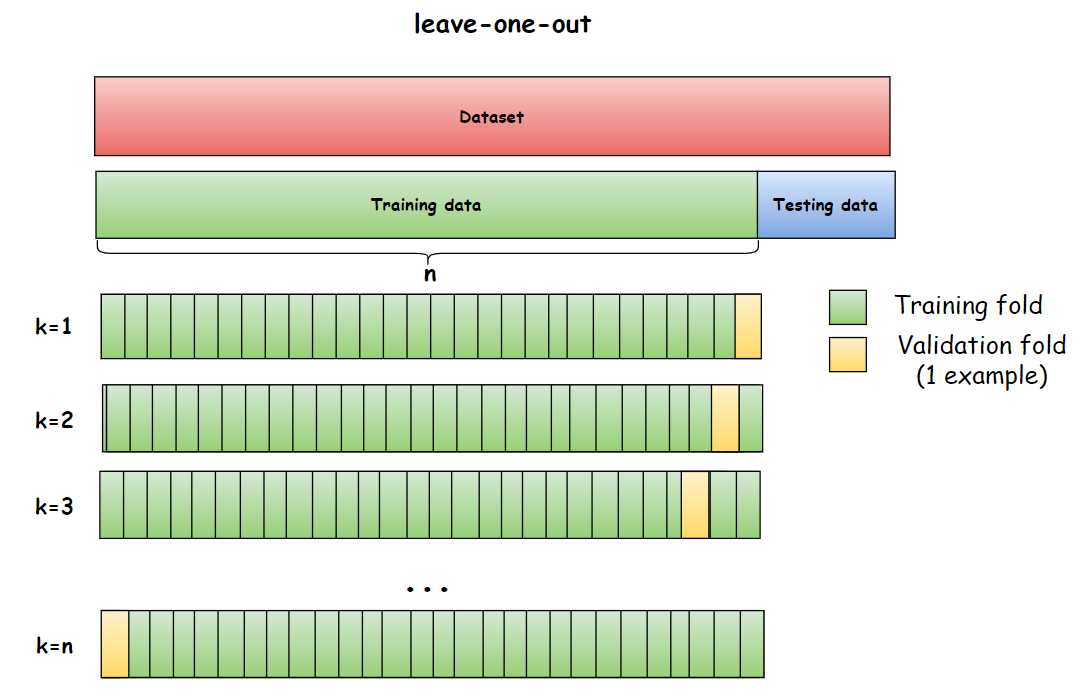

## ПРЕИМУЩЕСТВА И НЕДОСТАТКИ LEAVE-ONE-OUT

+ ПРЕИМУЩЕСТВА
 + Идеально подходит для небольших датасетов (менее 100 примеров).
 + Поскольку все доступные данные используются как для обучения, так и для валидации, значения метрик наиболее объективны и надёжны.

+ НЕДОСТАТКИ
 + Подход предусматривает, что мы обучаем одну и ту же модель $n$ раз. Очевидно, что чем больше примеров в обучающем наборе данных, тем больше моделей мы будем обучать. Поэтому метод не подходит для оценки качества модели на больших наборах данных, поскольку становится очень ресурсозатратным.

**Примечание.** Тем не менее в некоторых методах обучения вычисление leave-one-out получается заметно ускорить, и его использование становится возможным.

## РЕАЛИЗАЦИЯ МЕТОДА В SKLEARN

В библиотеке sklearn метод leave-one-out реализован в классе LeaveOneOut. Параметров инициализации у данного класса нет.

Работа с кросс-валидатором полностью идентична работе с KFold, который мы рассматривали ранее (цикл для организации кросс-валидации вручную будет выглядеть аналогично).

Объект класса LeaveOneOut также можно передать в функцию cross_validate() для получения метрик на каждом из примеров. В случае с метрикой accuracy список будет состоять из 0 и 1 (0 — модель не угадала класс на отложенном примере, 1 — модель угадала класс на отложенном примере).

Так как датасет у нас довольно большой (более трёх тысяч образцов воды), алгоритм кросс-валидации leave-one-out будет выполняться очень долго. Для экономии времени выполнения кода будем использовать первые 500 наблюдений из исходной таблицы.

### **Примечание**. Значение метрики будет рассчитано не для всего набора данных, а только для его части. Если вы захотите рассчитать метрику на всём наборе данных, вместо среза передавайте в функцию таблицу X и столбец y целиком. Но имейте в виду, что код в таком случае может выполняться до нескольких минут.

Итоговый код:

In [17]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём кросс-валидатор LeaveOneOut
loo = model_selection.LeaveOneOut()
 
#Считаем метрики на кросс-валидации leave-one-out
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X.iloc[:500], #матрица наблюдений X
    y=y.iloc[:500], #вектор ответов y
    cv=loo, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.95
Valid k-fold mean accuracy: 0.90


### **Примечание**. Метод leave-one-out можно реализовать и без использования специального класса — достаточно просто указать параметр n_split=n в инициализаторе KFold, где n — количество строк в таблице.

## Задание 2.9

Что такое leave-one-out-разбиение?

+ Разбиение, при котором расчёт метрик производится только на одном отложенном примере и повторяется для каждого наблюдения.
+ Частный случай k-fold-разбиения при $k = n$.

## Задание 2.10

Производится leave-one-out-валидация. Размер выборки, поданной на кросс-валидацию, — (120, 8). Сколько раз будет обучаться модель?

+ 120

Количество итераций обучения модели при leave-one-out-валидации равно количеству объектов в выборке. В нашем случае это 120 примеров.

### Обобщим изученные выше схемы валидации в виде таблицы:

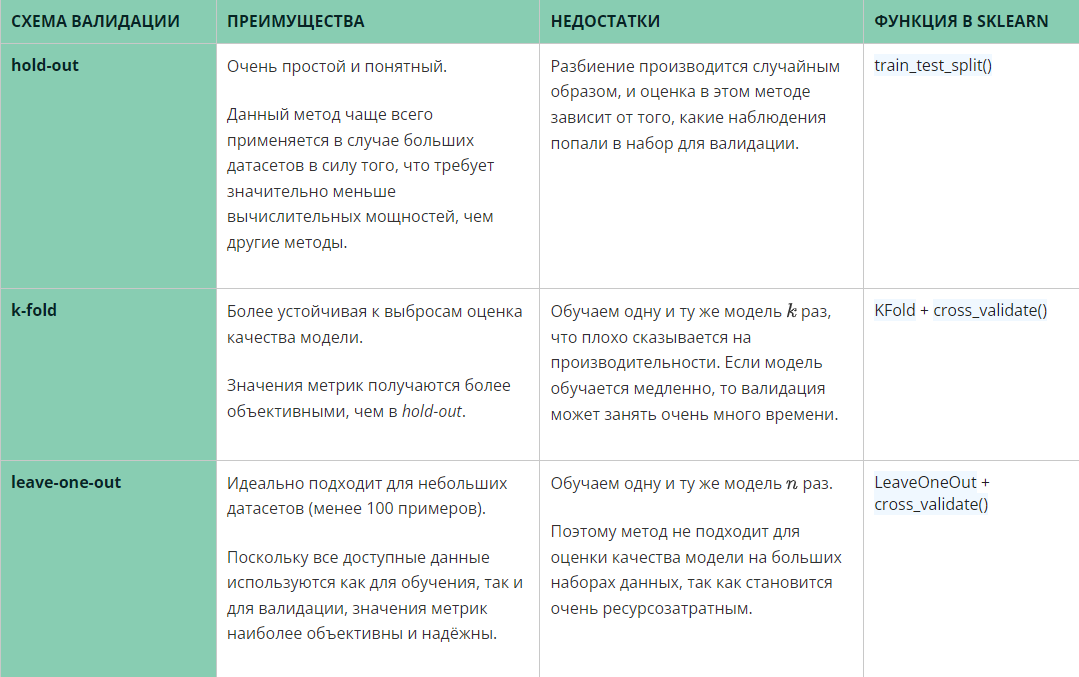